In [3]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors

In [4]:
### 1 - Open Optimisation File ###
# Training period (0-1600) normalised-RMSE (CV - cross validaiton mode)
# Test period (1601-1850) N-RMSE
# Solution list (list of lag times and selections by variable)


In [5]:
name='Output/optimisation_output.csv'
sol_file_av = pd.read_csv(name, index_col=None, sep=' ', header=0)    
num_sims=sol_file_av.shape[0]
print (sol_file_av)
print ("Number of optimisaiton evaluations: ", sol_file_av.shape[0])

            CV      Test                                                Sol
0     1.031146  1.023965  [1 1 1 3 4 4 7 5 4 1 5 1 5 7 1 7 2 4 3 6 5 1 4...
1     1.037526  0.995650  [5 1 1 1 2 1 6 4 7 4 4 1 1 4 2 7 3 1 5 5 1 2 2...
2     1.049760  1.032842  [5 2 1 5 7 2 7 2 6 7 2 7 1 3 1 7 1 1 4 4 3 2 5...
3     1.074070  1.023062  [5 1 5 3 7 1 6 5 3 1 2 6 6 4 2 5 1 7 7 1 6 1 6...
4     1.052434  1.049701  [7 3 2 6 7 4 3 6 7 6 6 2 4 3 5 3 6 6 6 2 6 4 6...
...        ...       ...                                                ...
1004  1.023646  0.995693  [ 3  2  4  3  2  3  5  2  4  3  1  3  3  1  8 ...
1005  1.016819  1.000704  [ 4  1  3  2  4  8  3  2  5  4  8  4  3  3  2 ...
1006  1.046550  0.993661  [2 4 2 5 2 1 5 3 1 4 1 5 5 1 1 3 7 7 7 5 4 3 4...
1007  1.024968  1.014472  [ 3  3  2  5  3  4  2  3  4  5  4  8  2  2  3 ...
1008  1.030638  0.993705  [ 2  4  3  4  5  2  8  3  5  3  6  1  3  3  3 ...

[1009 rows x 3 columns]
Number of optimisaiton evaluations:  1009


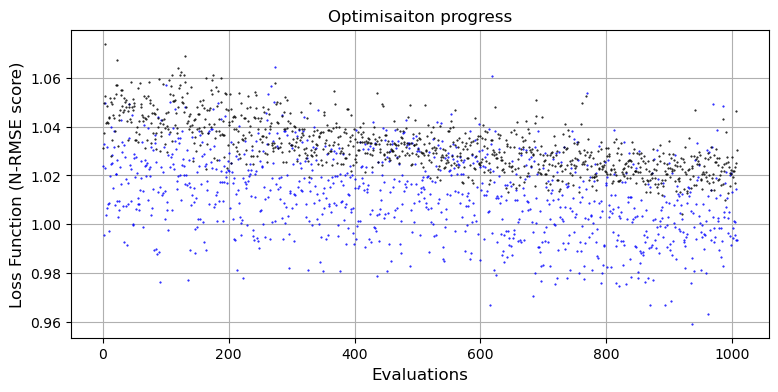

In [6]:
# Plot loss functions during evaluation process 
plt.figure(figsize=(9,4))
plt.plot(sol_file_av.index,sol_file_av['Test'],'b',marker='o',ms=0.5,lw=0)
plt.plot(sol_file_av.index,sol_file_av['CV'],'k',marker='o',ms=0.5,lw=0)

plt.title("Optimisaiton progress")
plt.xlabel('Evaluations',fontsize=12)

plt.ylabel('Loss Function (N-RMSE score)',fontsize=12)
#plt.ylim([0,1])
plt.grid()

plt.show()

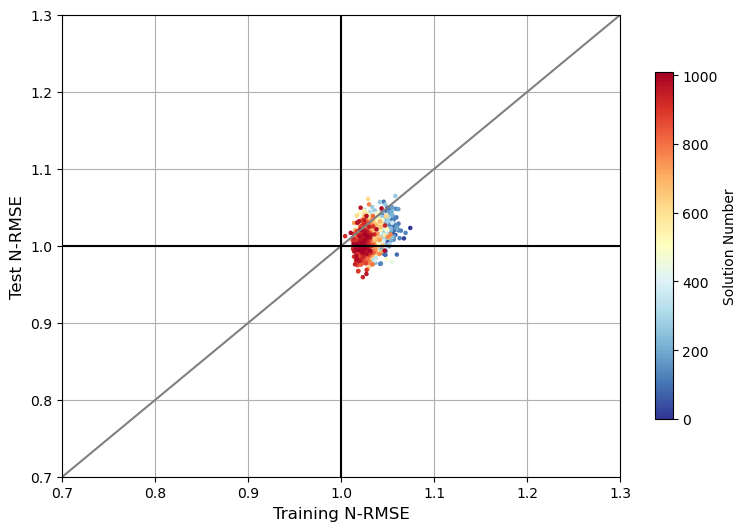

In [7]:
# Plot scatter plot to identify overfitting

plt.figure(figsize=(9,6))
plt.scatter(sol_file_av['CV'],sol_file_av['Test'],c=range(num_sims),s=5,alpha=1,cmap='RdYlBu_r')

cbar=plt.colorbar(label="Solution Number",shrink=0.75)
cbar.ax.tick_params(labelsize=10)

plt.plot([0,2],[0,2],ls='-', color='grey')
plt.axhline(y=1,ls='-',lw=1.5,color='black')
plt.axvline(x=1,ls='-',lw=1.5,color='black')

plt.xlabel("Training N-RMSE",fontsize=12)
plt.ylabel("Test N-RMSE",fontsize=12)
plt.xlim([0.7,1.3])
plt.ylim([0.7,1.3])

plt.grid()
plt.show()

In [ ]:
# Add best solution #